This is the common problem set for Homework 3 from the spring quarter Network Theory class at UC Davis taught by Prof. Raissa D'Souza. The original assignment is at [http://mae.engr.ucdavis.edu/dsouza/Classes/253-S16/hw3.pdf](http://mae.engr.ucdavis.edu/dsouza/Classes/253-S16/hw3.pdf). Source code for this notebook is on github at [https://github.com/camillescott/ucd-ecs253](https://github.com/camillescott/ucd-ecs253). 

In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'
import numpy as np
import networkx as nx
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.set_printoptions(precision=4, linewidth=100)

# Modularity Matrix

## Bisection of a binary undirected network

### Adjacency Matrix $A$

In [3]:
A = np.array( [[0, 1, 1, 1, 0, 0],
               [1, 0, 1, 0, 1, 0],
               [1, 1, 0, 0, 0, 1],
               [1, 0, 0, 0, 1, 1],
               [0, 1, 0, 1, 0, 1],
               [0, 0, 1, 1, 1, 0]] )

### Modularity Matrix $B$

In [4]:
k = A.sum(axis=0)
B = A - np.outer(k, k.T) / A.sum()
print(B)

[[-0.5  0.5  0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5 -0.5  0.5]
 [ 0.5 -0.5 -0.5 -0.5  0.5  0.5]
 [-0.5  0.5 -0.5  0.5 -0.5  0.5]
 [-0.5 -0.5  0.5  0.5  0.5 -0.5]]


### Eigenstuff

Here I define a function which calculates the eigenvalues of a given modularity matrix $B$, gets the eigenvector corresponding to the largest eigenvalue, and finds two communities based on the sign of that eigenvector.

In [5]:
def eigenvalue_communities(B):
    w, v = np.linalg.eig(B)
    print('Eigenvalues:\n', w)
    
    v_arrow = v[:,np.argmax(w)]
    print('Eigenvector for largest eigenvalue:\n', v_arrow)
    
    communities = np.where(v_arrow > 0, 
                           [1]*len(v_arrow), 
                           [2]*len(v_arrow))
    
    print('\nCommunities:')
    for i, community in enumerate(communities):
        print('Node {0}:'.format(i+1), 'Community', community)

The results seem reasonable -- each node has more edges to nodes in its own community than nodes in the other community.

In [6]:
eigenvalue_communities(B)

Eigenvalues:
 [ -2.0000e+00  -5.0673e-17   1.0000e+00  -2.0000e+00  -5.9734e-18  -1.0459e-16]
Eigenvector for largest eigenvalue:
 [-0.4082 -0.4082 -0.4082  0.4082  0.4082  0.4082]

Communities:
Node 1: Community 2
Node 2: Community 2
Node 3: Community 2
Node 4: Community 1
Node 5: Community 1
Node 6: Community 1


## Bisection of a weighted undirected network

### Adjacency Matrix $A$

In [7]:
A = np.array( [[0, 1, 0, .5],
               [1, 0, .5, 0],
               [0, .5, 0, 1],
               [.5, 0, 1, 0]])

### Modularity Matrix $B$

In [8]:
m = A.sum() / 2
print(m)

3.0


In [9]:
k = A.sum(axis=0)
B = A - (np.outer(k, k.T) / (2*m))
print(B)

[[-0.375  0.625 -0.375  0.125]
 [ 0.625 -0.375  0.125 -0.375]
 [-0.375  0.125 -0.375  0.625]
 [ 0.125 -0.375  0.625 -0.375]]


### Eigenstuff

From this point on the previously defined function will do the job. The resulting communities seem reasonable here as well: Nodes 1 and 2 are bound together tightly by their greater-weight edge, and the same for Nodes 3 and 4.

In [10]:
eigenvalue_communities(B)

Eigenvalues:
 [ -1.5000e+00  -5.0000e-01   5.0000e-01   2.5796e-17]
Eigenvector for largest eigenvalue:
 [ 0.5  0.5 -0.5 -0.5]

Communities:
Node 1: Community 1
Node 2: Community 1
Node 3: Community 2
Node 4: Community 2


# Pigou's Congestion

## Average Travel Time

We can calculate the average travel time as $\tau = T_1 x_1 + T_2 x_2$. We already know that $T_1 = 1$ and $T_2 = .25 + .75x_2$. We then end up with:

$$\tau = x_1 + x_2(.25 + .75x_2)$$

This expression is annoying though. Because $x_2 = 1 - x_1$, by substituting and after some shuffling, it can be rewritten as:

$$\tau = 1 - .75x_1 + .75x_1^2$$

To make this more clear, let's visualize $\tau$ with respect to $x_1$.

(0, 1.0)

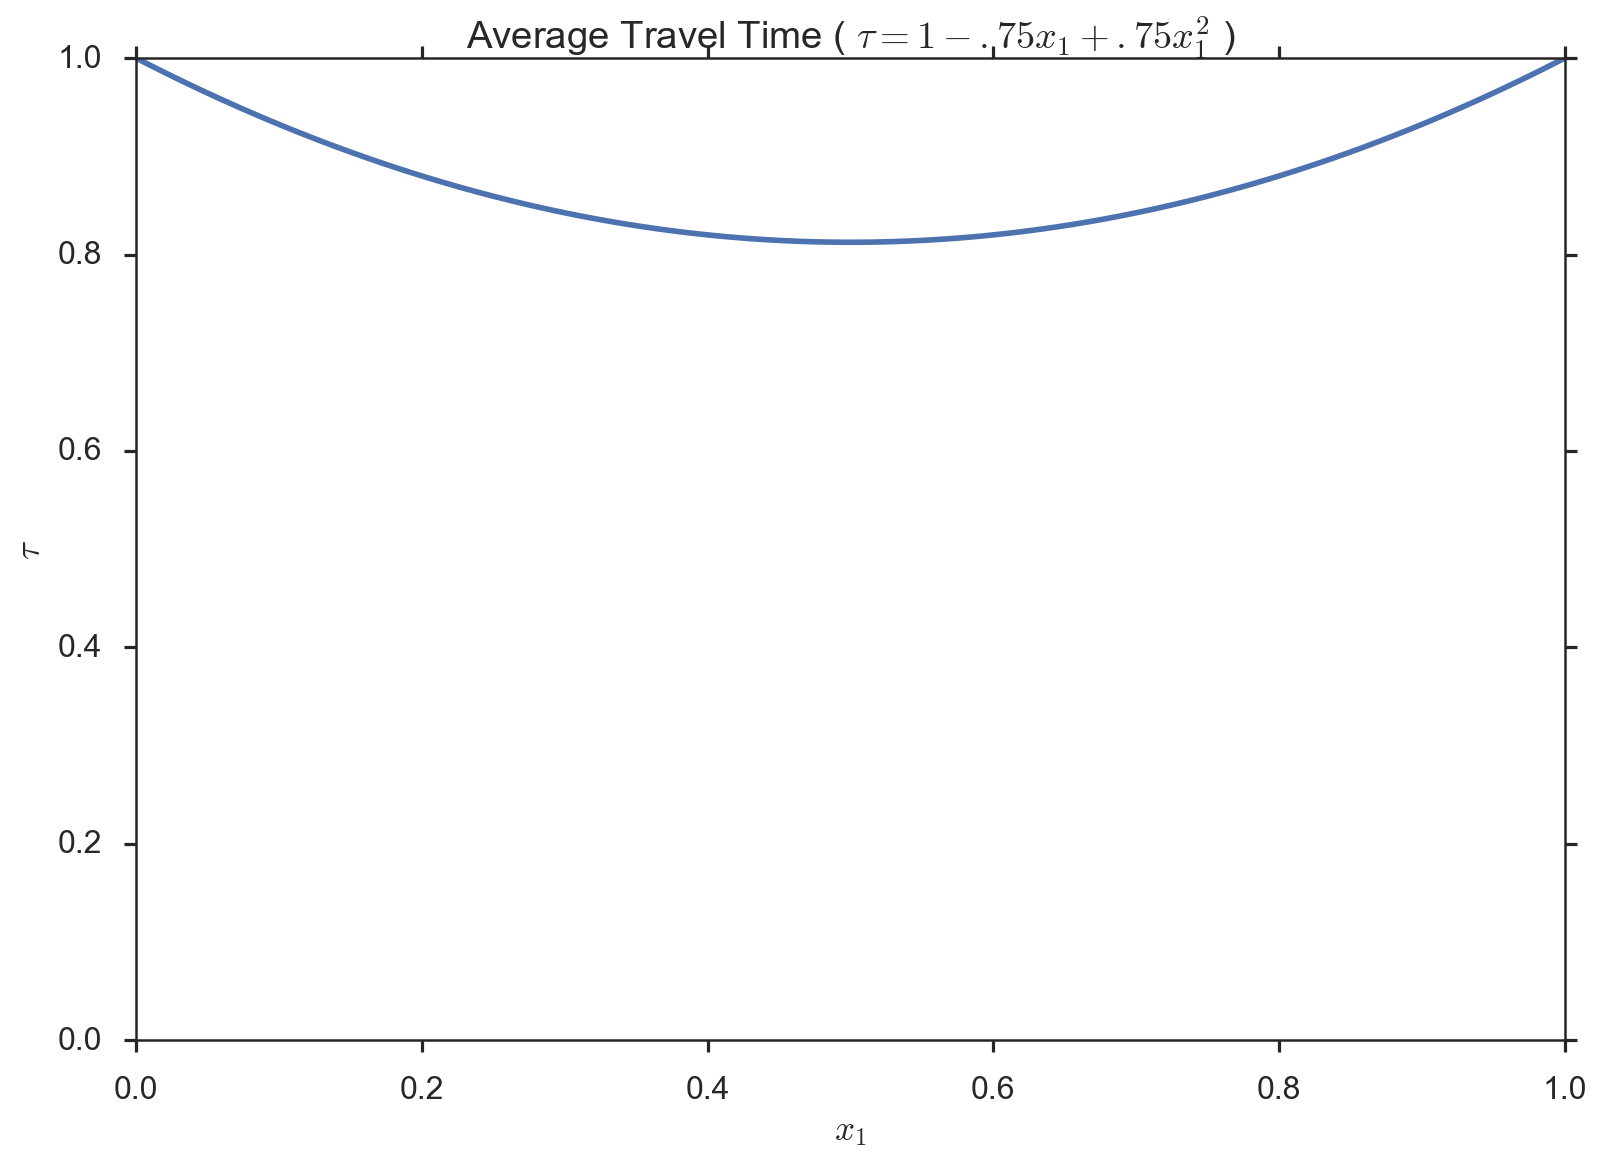

In [11]:
X_1 = np.linspace(0,1.0,100)
tau = 1 - .75 * X_1 + .75 * (X_1 ** 2)
plot(X_1, tau)
title(r'Average Travel Time ( $\tau = 1 - .75x_1 + .75x_1^2$ )')
xlabel('$x_1$')
ylabel(r'$\tau$')
ylim(0, 1.0)

## Optimal Flow Allocaton

We can see from the plot that the optimal allocation is somewhere around $0.5$. However, we can solve it explicitly by taking the derivitive of $\tau$ and setting it to zero.

$$\tau' = -.75 + 1.5x_1^2$$

Setting $\tau'$ to zero quickly leads to $x_1 = 0.5$, and trivially, $x_2 = 0.5$.

## Expected Travel Time for Optimal Flow

If we plug $x_1 = 0.5$ to $\tau$, we get $\tau_m = 0.8125$. This is also cleary illustrated in the plot. Here I add in these values to make things super clear. 

(0, 1.0)

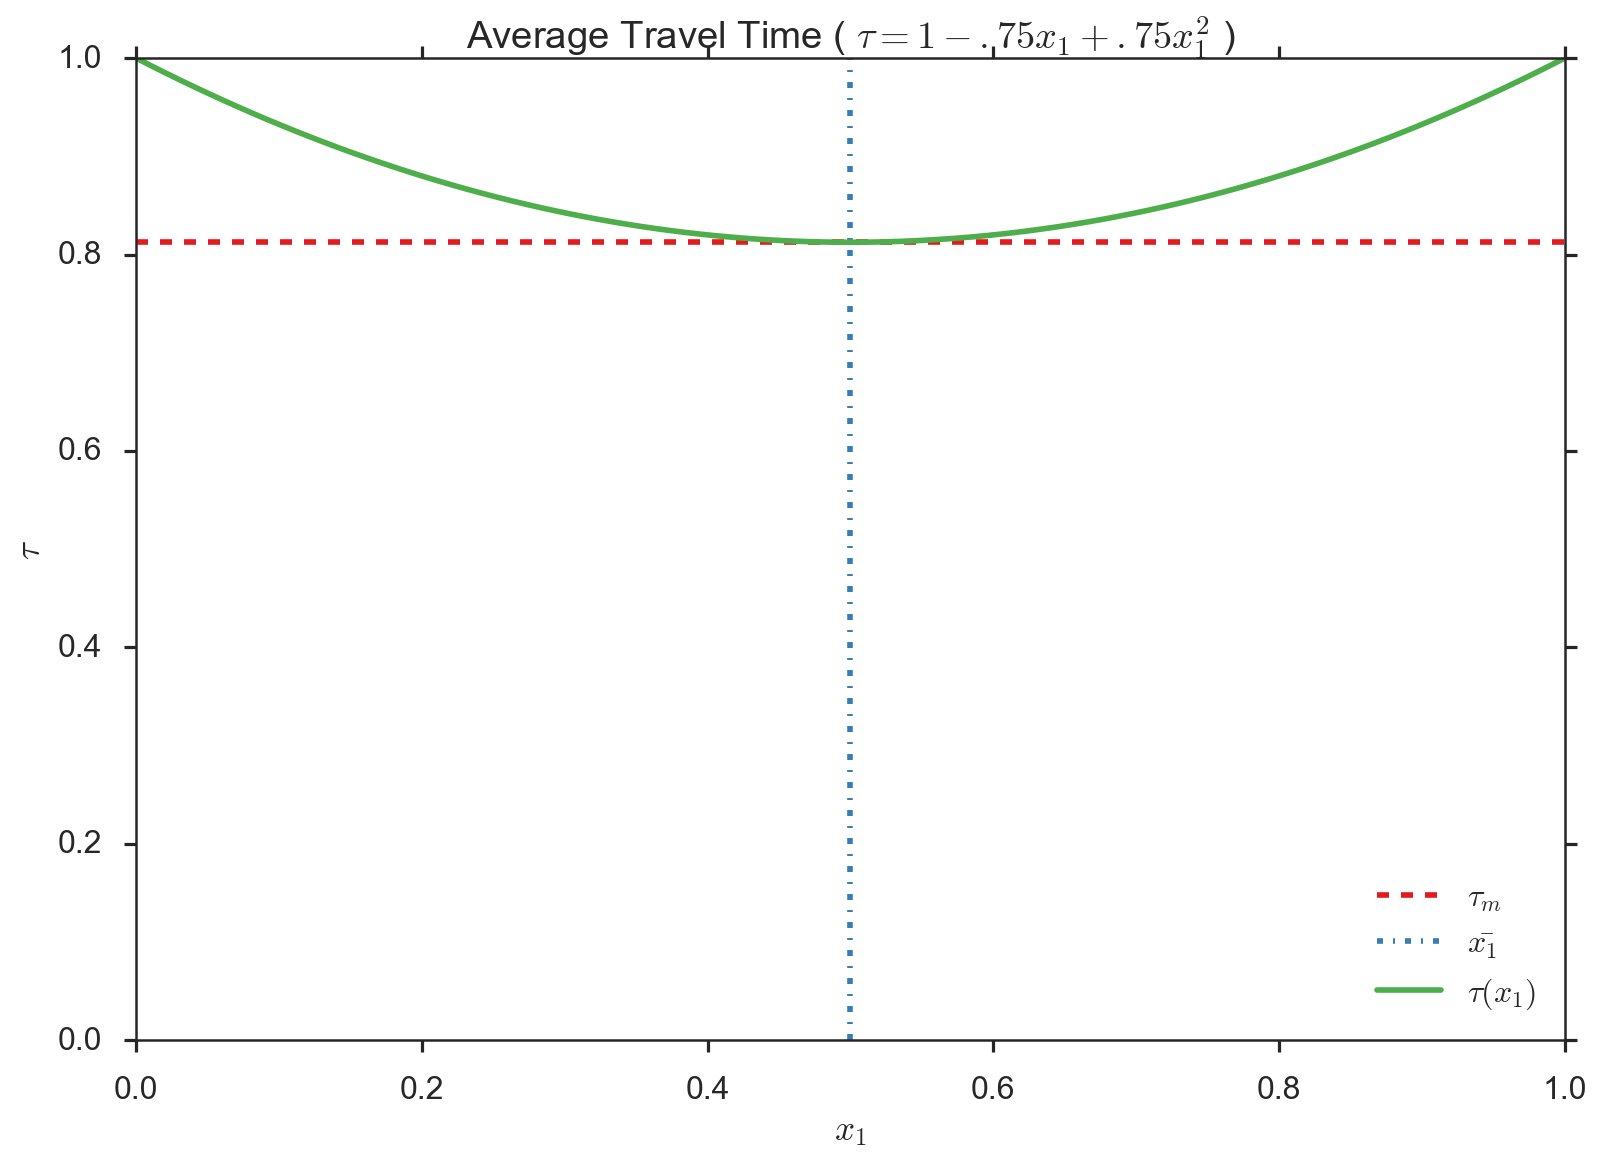

In [12]:
X_1 = np.linspace(0,1.0,100)
tau = 1 - .75 * X_1 + .75 * (X_1 ** 2)

colors = sns.color_palette("Set1", 3)
axhline(y=(1 - .75*.5 + .75*.5**2), 
        linestyle='--', label=r'$\tau_m$', c=colors[0])
axvline(x=0.5, 
        linestyle='-.', label=r'$\bar{x_1}$', c=colors[1])
plot(X_1, tau, label=r'$\tau(x_1)$', c=colors[2])

title(r'Average Travel Time ( $\tau = 1 - .75x_1 + .75x_1^2$ )')
xlabel('$x_1$')
ylabel(r'$\tau$')
legend(loc='lower right')
ylim(0, 1.0)